# **Currency Note Recognition**

In [ ]:
import zipfile
import os

dataset_path = "CNN_Dataset.zip"  # Path to the uploaded dataset
extract_path = "dataset"

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os



In [ ]:
train_dir = "dataset/Train"
test_dir = "dataset/Test"

# Image parameters
img_size = (128, 128)
batch_size = 32

# Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')

print("Classes: ", train_generator.class_indices)


Found 153 images belonging to 7 classes.
Found 42 images belonging to 7 classes.
Classes:  {'1Hundrednote': 0, '2Hundrednote': 1, '2Thousandnote': 2, '5Hundrednote': 3, 'Fiftynote': 4, 'Tennote': 5, 'Twentynote': 6}


In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,543 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 27  # Increase for better accuracy

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs
)

Epoch 1/27
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 920ms/step - accuracy: 0.3950 - loss: 2.1839 - val_accuracy: 0.2381 - val_loss: 1.6383
Epoch 2/27
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.3622 - loss: 1.6400 - val_accuracy: 0.2381 - val_loss: 1.6473
Epoch 3/27
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - accuracy: 0.3234 - loss: 1.6571 - val_accuracy: 0.4524 - val_loss: 1.3324
Epoch 4/27
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step - accuracy: 0.3620 - loss: 1.5446 - val_accuracy: 0.4762 - val_loss: 1.1650
Epoch 5/27
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 0.5063 - loss: 1.2291 - val_accuracy: 0.5476 - val_loss: 1.0023
Epoch 6/27
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - accuracy: 0.4993 - loss: 1.1887 - val_accuracy: 0.6190 - val_loss: 0.9138
Epoch 7/27
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 0.5024 - loss: 1.2285 - val_accuracy: 0.6667 - val_loss: 0.8546
Epoch 8/27
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 371ms/step - accuracy: 0.5613 - loss: 1.1714 - val_accuracy: 0.5476 - val_loss:

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


Text(0.5, 1.0, 'Accuracy')

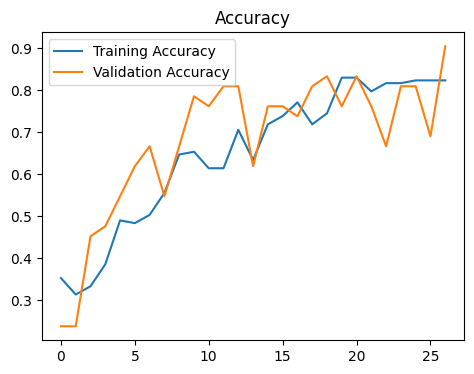

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

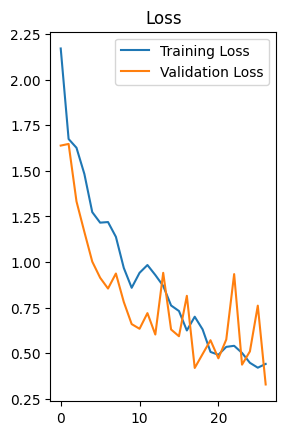

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()

In [ ]:
model.save("currency_cnn_model.h5")

# To load the model later:
# model = keras.models.load_model("currency_cnn_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


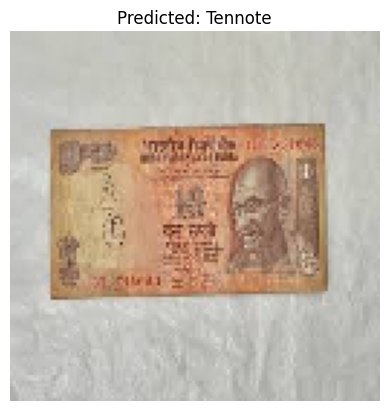

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_currency(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])
    class_name = list(train_generator.class_indices.keys())[class_idx]

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {class_name}")
    plt.show()

# Example usage
predict_currency("/content/images (1).jpeg")  # Change path to an actual image
